In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Import Data from april 2015 CEP Survey
cep73 = pd.read_csv("https://raw.githubusercontent.com/rarmijok/Analytical-Politics/master/DATA/Encuesta%20CEP%2073%20Abril%202015.csv", index_col='FILTRO')
###PENDING: IMPORT FROM SPSS FILE

cleanup_nums = {"POSICION_POLITICA":{1:"Right",2:"Center",3:"Left",4:"Independent",5:np.nan}}
pos_order=["Left","Center","Right","Independent"]
cep73.replace(cleanup_nums, inplace=True)
#cep73["POSICION_POLITICA"]= cep73["POSICION_POLITICA"].astype('category')

#Rename T Score Columns
cep73=cep73.rename(columns={"MB_P19_A":"A Allamand","MB_P19_B":"I Allende","MB_P19_C":"O Andrade","MB_P19_D":"A Arenas","MB_P19_E":"M Bachelet","MB_P19_F":"M Enriquez-O","MB_P19_G":"C Escalona","MB_P19_H":"A Espina","MB_P19_I":"N Eyzaguirre","MB_P19_J":"G Girardi","MB_P19_K":"R LagosE","MB_P19_L":"R LagosW","MB_P19_M":"E Matthei","MB_P19_N":"C Mockenber","MB_P19_O":"C Montes","MB_P19_P":"MJ Ossandon","MB_P19_Q":"R Penailillo",  "MB_P19_R":"L Perez","MB_P19_S":"S Pinera","MB_P19_T":"J Pizarro","MB_P19_U":"J Quintana","MB_P19_V":"X Rincon","MB_P19_W":"G Tellier","MB_P19_X":"C Toha","MB_P19_Y":"C Vallejo","MB_P19_Z":"A Velasco","MB_P19_AA":"Von Baer","MB_P19_BB":"I Walker", "MB_P19_CC":"P Walker","MB_P19_DD":"Ma Nunez","MB_P19_EE":"F Kast"})
cep73[cep73.iloc[:,33:64]>5]=np.nan 
#Thermometer Scores matrix / SUBSET T SCORES
T = cep73.iloc[:,33:64]
pos=cep73["POSICION_POLITICA"]
print(pos.head())
Tcomplete = T.dropna()
Tcomplete = Tcomplete.to_numpy()
T = T.to_numpy() #JOJO
print(Tcomplete)

FILTRO
1    Independent
2    Independent
3    Independent
4    Independent
5           Left
Name: POSICION_POLITICA, dtype: object
[[3. 4. 2. ... 2. 2. 3.]
 [4. 4. 4. ... 4. 4. 4.]
 [2. 3. 3. ... 3. 3. 3.]
 ...
 [4. 3. 2. ... 4. 2. 3.]
 [4. 4. 5. ... 4. 5. 4.]
 [1. 1. 1. ... 1. 1. 1.]]


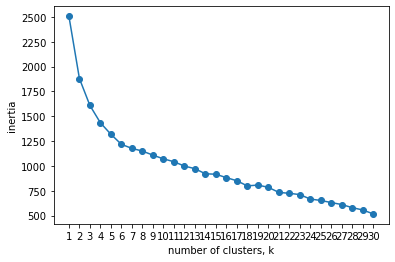

In [56]:
ks = range(1, 31)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model= KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Tcomplete)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_) 
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()




In [ ]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)
model.fit(Tcomplete)
print(model.inertia_)

# Determine the cluster labels of new_points: labels
labels = model.predict(Tcomplete)#OJO OJO OJO Tcomplete
print(labels)



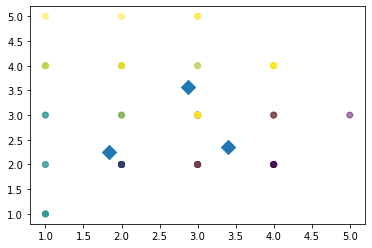

In [49]:
# Make a scatter plot using labels to define the colors
plt.scatter(Tcomplete[:,0],y = Tcomplete[:,1],alpha=0.5,c=labels) #OJO OJO OJO Tcomplete

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=100.)
plt.show()


In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])
# Display ct
print(ct)


In [59]:

# Create scaler: scaler
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)
# Import pandas
import pandas as pd
# Fit the pipeline to samples
pipeline.fit(samples)
# Calculate the cluster labels: labels
labels = pipeline.predict(samples)
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})
# Create crosstab: ct
ct = pd.crosstab(df['labels'] , df['species'])
# Display ct
print(ct)



NameError: name 'samples' is not defined

In [ ]:


# Import Normalizer
from sklearn.preprocessing import Normalizer
# Create a normalizer: normalizer
normalizer = Normalizer()
# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to the daily price movements
pipeline.fit(movements)
# Predict the cluster labels: labels
labels = pipeline.predict(movements)
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})
# Display df sorted by cluster label
print(df.sort_values('labels'))
